# Imports

In [4]:
from Crypto.Cipher import DES3
from Crypto.Util.Padding import pad
from Crypto.Util.Padding import unpad
import os
import secrets

# Reshape Image

In [3]:
import os
from PIL import Image
path = './data/Train/TDES/NonEnc/'

image_files = [f for f in os.listdir('./data/Train/TDES/NonEnc/') if f.endswith(('.jpg', '.png', '.jpeg'))]

for img_name in image_files:
    read_path = os.path.join(path, img_name)
    image = Image.open(read_path)
    new_image = image.resize((64,64))
    new_image.save('./data/Train/TDES/Img_Non_Enc/' + img_name)


# Encrypting Images

In [5]:
def getKey(keysize):

    key = secrets.token_bytes(keysize)
    return key

def getIV(blocksize):

    iv = secrets.token_bytes(blocksize)
    return iv

In [6]:
def tdes_encrypt_image(filename, input_image_path, key, iv):
    encrypted_filename = 'TDES_Enc_' + filename
    encrypted_filepath = './data/Train/TDES/TDESEnc/' + encrypted_filename

    # Read the image
    with open(input_image_path, 'rb') as f:
        image_data = f.read()

    # Create a 3DES cipher object
    cipher = DES3.new(key, DES3.MODE_CBC, iv)

    # Pad the image data to fit block size
    padded_data = pad(image_data, DES3.block_size)

    # Encrypt the padded data
    encrypted_data = cipher.encrypt(padded_data)

    # Save the encrypted data to a new image file
    with open(encrypted_filepath, 'wb') as f:
        f.write(encrypted_data)
    
    return encrypted_filename

In [7]:
path = './data/Train/TDES/Img_Non_Enc/'

image_files = [f for f in os.listdir('./data/Train/TDES/Img_Non_Enc/') if f.endswith(('.jpg', '.png', '.jpeg'))]

for img_name in image_files:
    read_path = os.path.join(path, img_name)

    # Generate a random 24-byte key for 3DES (192 bits)
    key = getKey(24)
    iv = getIV(8)

    # Encrypt the image
    encrypted_filename = tdes_encrypt_image(img_name, read_path, key, iv)

    print("Enc File Name:", encrypted_filename, "Key:", key, "IV:", iv)

    # Save the details to a file
    with open('./data/Train/TDES/Encryption_details/Encryption_details.txt', 'a') as file:
        file.write(f"Image File: {img_name}, Encrypted File: {encrypted_filename}, Key: {key}, IV: {iv}\n")


Enc File Name: TDES_Enc_Eight_full (1).jpg Key: b'\x06BHJ\x0ez0\x03D\xfaI\xa2%\x02N\x8a+1\x06\x11\xca\x98A7' IV: b'\xdb\xcfA\xbb\xad\xad5\xbe'
Enc File Name: TDES_Enc_Eight_full (10).jpg Key: b'\xfb\x01U\x9b\x9c\xa4\x83\xe4fVv\xbb\xfd\xa9+hc\xeci\n\x0bbO\x03' IV: b'\xd3\xab\xaa\x01\xa2\x11f\xc5'
Enc File Name: TDES_Enc_Eight_full (102).jpg Key: b'\x14\x16\xf4\xcb4\xea)\xd9\xcc\x92\x924\xe1\x97j\x95O\x91\xfb\xb3\xe73K\xa8' IV: b'\xcb\x8aN\x0f\x9fD\xbaI'
Enc File Name: TDES_Enc_Eight_full (103).jpg Key: b'\xcf\x12\xa5e\xc8\x17\x9d+\x021\xca\x0e-~po\x89\xc5\xf2R\xdc\xd8\xf8\x0e' IV: b'f\xeb\xae\x9b\x0e6\x1f\x80'
Enc File Name: TDES_Enc_Eight_full (107).jpg Key: b'Jk\xe5\xc7K~\x93\x1d\xa1\xe1\x0f\x866\xb8\x05\x9b\x1f\t\xac\x1c;\xa4jE' IV: b'}Ss\xb9&\xb7.\x14'
Enc File Name: TDES_Enc_Eight_full (108).jpg Key: b'\xb73\xc6zg\x80\xa3\x16\xfc\xd8\xc4[\x1b\xa2z\x86\x98\xcep\xa7F\x85\xde\x1b' IV: b'\xa4\xdbQ\x8c\xb7\x8b\x9d)'
Enc File Name: TDES_Enc_Eight_full (109).jpg Key: b"\x82O\xde\x9d\xb7\x

# Decrypting Images

In [8]:
def tdes_decrypt_image(filename, key, iv):
    decrypted_filename = "TDES_Dec_" + filename
    decrypted_filepath = './data/Train/TDES/TDESDec/' + decrypted_filename

    # Read the encrypted image data
    with open('./data/Train/TDES/TDESEnc/' + filename, 'rb') as file1:
        encrypted_data = file1.read()

    # Create a 3DES cipher object
    cipher = DES3.new(key, DES3.MODE_CBC, iv)

    # Decrypt the data
    decrypted_data = unpad(cipher.decrypt(encrypted_data), DES3.block_size)

    # Save the decrypted data to a new image file
    with open(decrypted_filepath, 'wb') as file2:
        file2.write(decrypted_data)

    return decrypted_filename

In [9]:
# Input for the file to decrypt
filename_to_decrypt = 'TDES_Enc_Eight_full (1).jpg'

# Input for the key
key = b'\x06BHJ\x0ez0\x03D\xfaI\xa2%\x02N\x8a+1\x06\x11\xca\x98A7'

iv = b'\xdb\xcfA\xbb\xad\xad5\xbe'

# Decrypt the image using user-provided inputs
decrypted_filename = tdes_decrypt_image(filename_to_decrypt, key, iv)

print("Decrypted File Name:", decrypted_filename)

Decrypted File Name: TDES_Dec_TDES_Enc_Eight_full (1).jpg


# Visualising image before encryption, after encryption and after decryption

In [10]:
import numpy as np
import matplotlib.pyplot as plt

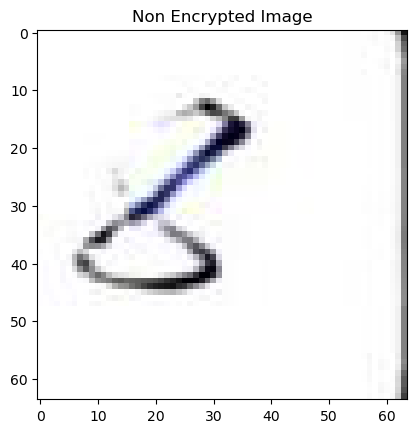

(64, 64, 3)


In [14]:
image_path = './data/Train/TDES/Img_Non_Enc/Eight_full (1).jpg'
image = plt.imread(image_path)
plt.imshow(image)
plt.title('Non Encrypted Image')
plt.show()
print(image.shape)

b'\xa7\xc0\xc7\xac3\x94\x8e"\x0eyUo@\t\x8c|\x8a\x16\xed\xb0$\xe9\x0fY\x16\xaee\x1ag\xb0S\xa5\x8a\xb9\xe68\x946\xce\xd6\x9bk`\xfe\xe9R\xac\xac\xb7\x90\xcc\xf4\xa3\x93I\x84]4\xb9 \xa1\xa16\xd2\xbf\xda\x87\xbe^Y\xb5\xcd\xe5\xb2\x83L\xf5\xe2c\x9f\xe8\xff\xf2\x06\xd9\nd*\xec\nJ\xfc%\x14%\xe5k\x8fV9U\xc48/\xa0A\x87@\xe5V\n-\xb84>\x8c\x05\x05\x92Z.\xfcG\x1b\xd3(\xec\x15Z\x82D\xb7\xbc\xc3\x1e\xba\tS\x12\xa3\xec\x92\xbeT\xd2\xedI\xa2\\N->n\xe52\x02\x9aUe\xf1O\x9b\xa2\xd1\xa7\x88#\xd7\xdb|\xd5S\x16\xe4\xd6\n\xec\xa3\xe1\x82`\x18r\xa25\x84\x94.\x8c\xe3\x9c\xe7\x1a\x12\x9f\xf5\x12\x11|i0j\xea\xf1\xa9\xac`d\xaf\xe0\xd3\x08\x91\x14y\x1b\xeei\x0f\xcd\xc1\x84\x0c"\xb3P\xaf\x13\x07\xbc\xfa;\xe4\xaa\xd8\xc1_\xf98\xcc7;\xfe\x89\xa5\t\xb2*\x90\xecH$\x89O\x99\x9b\x0f\x91\x14\x1bT\x96U>J\xc0\x9eam\x85\xa9j5\x9f\x97\x1e7\x92\xa9^\xcd\xa8\xe6\xc8\x87\xea\xd8\xc3>\xbf\x07\x8e\xd5Sg\x13\xa3\x90\xb9\x0eJ\xech\n\xb14\x07\xcb\xf7D\x92\x17FC\x7f3U\xaf\xee5\xe6)\xd1\x80\x90\x168\x1c`\xd5p\x9eKU\xda\x94\xaa\xf0\xc8Y\

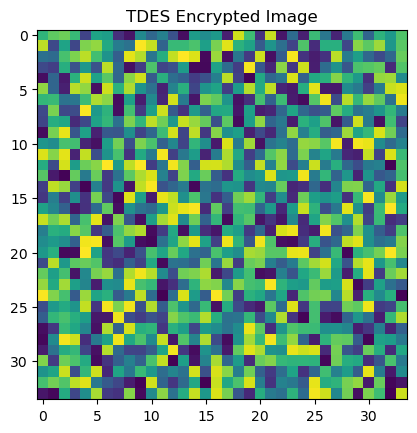

(34, 34)


In [22]:
image_path = './data/Train/TDES/TDESEnc/TDES_Enc_Eight_full (1).jpg'

# Read the image file as a binary file
with open(image_path, 'rb') as file:
    encrypted_data = file.read()

# Convert binary data to a NumPy array of integers
encrypted_array = np.frombuffer(encrypted_data, dtype=np.uint8)
print(encrypted_array)

# Reshape the array into a 2D array for visualization
height = int(np.sqrt(len(encrypted_array)))
width = len(encrypted_array) // height
encrypted_image = encrypted_array[:height * width].reshape((height, width))

# Display the encrypted image as grayscale
plt.imshow(encrypted_image)
plt.title('TDES Encrypted Image')
plt.show()
print(encrypted_image.shape)

In [18]:
import os
import numpy as np
from PIL import Image

In [19]:
path = './data/Train/TDES/TDESEnc/'
output_path = './data/Train/TDES/Enc_Img_Readable/'

image_files = [f for f in os.listdir(path) if f.endswith(('.jpg', '.png', '.jpeg'))]

for img_name in image_files:
    # Read the image file as a binary file
    image_path = os.path.join(path, img_name)
    with open(image_path, 'rb') as file:
        encrypted_data = file.read()
    
    # Convert binary data to a NumPy array of integers
    encrypted_array = np.frombuffer(encrypted_data, dtype=np.uint8)

    # Reshape the array into a 2D array for visualization
    height = int(np.sqrt(len(encrypted_array)))
    width = len(encrypted_array) // height
    encrypted_image = encrypted_array[:height * width].reshape((height, width))

    # Convert NumPy array back to image and save it
    reshaped_image = Image.fromarray(encrypted_image)
    output_image_path = os.path.join(output_path, f"reshaped_{img_name}")
    reshaped_image.save(output_image_path)

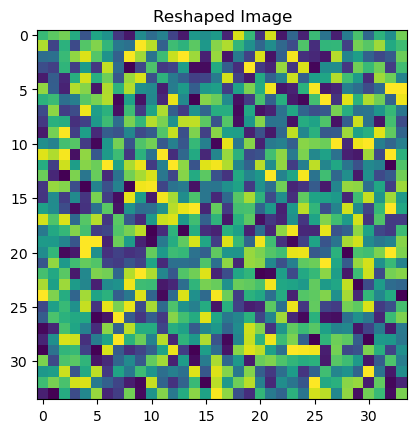

(34, 34)


In [21]:
image_path = './data/Train/TDES/Enc_Img_Readable/reshaped_TDES_Enc_Eight_full (1).jpg'
image = plt.imread(image_path)
plt.imshow(image)
plt.title('Reshaped Image')
plt.show()
print(image.shape)

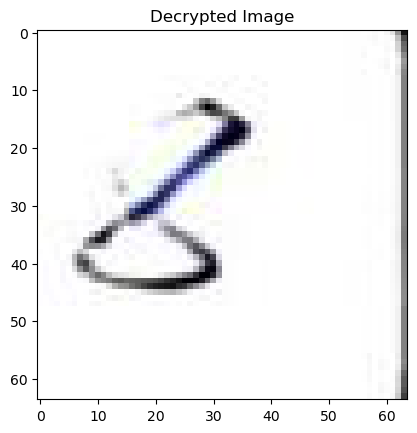

(64, 64, 3)


In [16]:
image_path = './data/Train/TDES/TDESDec/TDES_Dec_TDES_Enc_Eight_full (1).jpg'
image = plt.imread(image_path)
plt.imshow(image)
plt.title('Decrypted Image')
plt.show()
print(image.shape)